In [64]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_BRFSS = pd.read_csv("../Data/BRFSS_preprocessed.csv")

In [45]:
df_BRFSS.head()

,Unnamed: 0,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,ctelenm1,pvtresd1,colghous,statere1,celphon1,ladult1,colgsex,numadult,landsex,nummen,numwomen,respslct,safetime,ctelnum1,cellfon5,cadult1,cellsex,pvtresd3,cclghous,cstate1,landline,hhadult,sexvar,genhlth,physhlth,menthlth,poorhlth,priminsr,persdoc3,medcost1,checkup1,exerany2,bphigh6,bpmeds,cholchk3,toldhi3,cholmed3,cvdinfr4,cvdcrhd4,cvdstrk3,asthma3,asthnow,chcscncr,chcocncr,chccopd3,addepev3,chckdny2,diabete4,diabage3,havarth5,arthexer,arthedu,lmtjoin3,arthdis2,joinpai2,marital,educa,renthom1,numhhol3,numphon3,cpdemo1b,veteran3,employ1,children,income3,pregnant,weight2,height3,deaf,blind,decide,diffwalk,diffdres,diffalon,smoke100,smokday2,usenow3,ecignow1,alcday5,avedrnk3,drnk3ge5,maxdrnks,flushot7,flshtmy3,imfvpla2,pneuvac4,hivtst7,hivtstd3,fruit2,fruitju2,fvgreen1,frenchf1,potatoe1,vegetab2,pdiabtst,prediab1,insulin1,bldsugar,feetchk3,doctdiab,chkhemo3,feetchk,eyeexam1,diabeye,diabedu,toldcfs,havecfs,workcfs,toldhepc,trethepc,prirhepc,havehepc,havehepb,medshepb,hpvadvc4,hpvadsht,tetanus1,shingle2,lcsfirst,lcslast,lcsnumcg,lcsctscn,hadmam,howlong,cervscrn,crvclcnc,crvclpap,crvclhpv,hadhyst2,psatest1,psatime1,pcpsars2,pcstalk,hadsigm4,colnsigm,colntes1,sigmtes1,lastsig4,colncncr,vircolo1,vclntes1,smalstol,stoltest,stooldn1,bldstfit,sdnates1,cncrdiff,cncrage,cncrtyp1,csrvtrt3,csrvdoc1,csrvsum,csrvrtrn,csrvinst,csrvinsr,csrvdein,csrvclin,csrvpain,csrvctl2,hombpchk,homrgchk,wherebp,sharebp,wtchsalt,dradvise,cimemlos,cdhouse,cdassist,cdhelp,cdsocial,cddiscus,caregiv1,crgvrel4,crgvlng1,crgvhrs1,crgvprb3,crgvalzd,crgvper1,crgvhou1,crgvexpt,acedeprs,acedrink,acedrugs,aceprisn,acedivrc,acepunch,acehurt1,aceswear,acetouch,acetthem,acehvsex,aceadsaf,aceadned,marijan1,usemrjn3,rsnmrjn2,lastsmk2,stopsmk2,firearm5,gunload,loadulk2,rcsgendr,rcsrltn2,casthdx2,casthno2,birthsex,somale,sofemale,trnsgndr,qstver,qstlang,x.metstat,x.urbstat,mscode,x.ststr,x.strwt,x.rawrake,x.wt2rake,x.imprace,x.chispnc,x.crace1,x.cprace1,cageg,x.cllcpwt,x.dualuse,x.dualcor,x.llcpwt2,x.llcpwt,x.rfhlth,x.phys14d,x.ment14d,x.hlthpln,x.hcvu652,x.totinda,x.rfhype6,x.cholch3,x.rfchol3,x.michd,x.ltasth1,x.casthm1,x.asthms1,x.drdxar3,x.lmtact3,x.lmtwrk3,x.prace1,x.mrace1,x.hispanc,x.race,x.raceg21,x.racegr3,x.raceprv,x.sex,x.ageg5yr,x.age65yr,x.age80,x.age.g,htin4,htm4,wtkg3,x.bmi5,x.bmi5cat,x.rfbmi5,x.chldcnt,x.educag,x.incomg1,x.smoker3,x.rfsmok3,x.cureci1,drnkany5,drocdy3.,x.rfbing5,x.drnkwk1,x.rfdrhv7,x.flshot7,x.pneumo3,x.aidtst4,ftjuda2.,frutda2.,grenda1.,frnchda.,potada1.,vegeda2.,x.misfrt1,x.misveg1,x.frtres1,x.vegres1,x.frutsu1,x.vegesu1,x.frtlt1a,x.veglt1a,x.frt16a,x.veg23a,x.fruite1,x.vegete1
0,1,1,1,1192021,1,19,2021,1100,2021000001,2021000001,1.0,1.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5.0,20.0,10.0,88.0,3.0,1.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN,1.0,2.0,2.0,2.0,1.0,8.0,1.0,4.0,1.0,1.0,1.0,1.0,2.0,7.0,88.0,5.0,NaN,72.0,411.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,3.0,888.0,NaN,NaN,NaN,1.0,92020.0,1.0,1.0,2.0,NaN,101.0,555.0,204.0,203.0,201.0,101.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,1.0,1.0,1.0,11011,39.766158,2.0,79.532315,1,9.0,NaN,NaN,NaN,NaN,1,0.519019,874.242902,744.745531,2,3,2,1,9,2,1,1,2.0,2.0,2,2,1,1.0,2.0,1.0,1.0,1.0,2,1,1,1,1,2,11,2,70,6,59.0,150.0,3266.0,1454.0,1.0,1,1,2,3,3,1,1,2,0,1,0,1,1.0,1.0,2.0,0.0,100.0,57.0,43.0,14.0,100.0,0,0,1,1,100.0,214.0,1,1,1,1,0,0
1,2,1,1,1212021,1,21,2021,1100,2021000002,2021000002,1.0,1.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,Na

In [24]:
print(len(df_BRFSS.columns.values))

304


In [23]:
display(df_BRFSS.columns.values)

array(['Unnamed: 0', 'x.state', 'fmonth', 'idate', 'imonth', 'iday',
       'iyear', 'dispcode', 'seqno', 'x.psu', 'ctelenm1', 'pvtresd1',
       'colghous', 'statere1', 'celphon1', 'ladult1', 'colgsex',
       'numadult', 'landsex', 'nummen', 'numwomen', 'respslct',
       'safetime', 'ctelnum1', 'cellfon5', 'cadult1', 'cellsex',
       'pvtresd3', 'cclghous', 'cstate1', 'landline', 'hhadult', 'sexvar',
       'genhlth', 'physhlth', 'menthlth', 'poorhlth', 'priminsr',
       'persdoc3', 'medcost1', 'checkup1', 'exerany2', 'bphigh6',
       'bpmeds', 'cholchk3', 'toldhi3', 'cholmed3', 'cvdinfr4',
       'cvdcrhd4', 'cvdstrk3', 'asthma3', 'asthnow', 'chcscncr',
       'chcocncr', 'chccopd3', 'addepev3', 'chckdny2', 'diabete4',
       'diabage3', 'havarth5', 'arthexer', 'arthedu', 'lmtjoin3',
       'arthdis2', 'joinpai2', 'marital', 'educa', 'renthom1', 'numhhol3',
       'numphon3', 'cpdemo1b', 'veteran3', 'employ1', 'children',
       'income3', 'pregnant', 'weight2', 'height3', 'deaf

In [42]:
# Columns with more than 50% of Null Values
Null_cols = df_BRFSS.isnull().sum()/len(df_BRFSS)
BRFSS_Nullcols = Null_cols[Null_cols>0.6].index
display(len(BRFSS_Nullcols))

147

In [43]:
BRFSS_Nullcols

Index(['ctelenm1', 'pvtresd1', 'colghous', 'statere1', 'celphon1', 'ladult1',
       'colgsex', 'numadult', 'landsex', 'nummen',
       ...
       'somale', 'sofemale', 'mscode', 'x.crace1', 'x.cprace1', 'cageg',
       'x.cllcpwt', 'x.dualcor', 'x.flshot7', 'x.pneumo3'],
      dtype='object', length=147)

In [47]:
#Saperating out the Indiana State from rest of the states 
df_Indiana = df_BRFSS[df_BRFSS['x.state']==18]

In [49]:
df_Indiana

,Unnamed: 0,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,ctelenm1,pvtresd1,colghous,statere1,celphon1,ladult1,colgsex,numadult,landsex,nummen,numwomen,respslct,safetime,ctelnum1,cellfon5,cadult1,cellsex,pvtresd3,cclghous,cstate1,landline,hhadult,sexvar,genhlth,physhlth,menthlth,poorhlth,priminsr,persdoc3,medcost1,checkup1,exerany2,bphigh6,bpmeds,cholchk3,toldhi3,cholmed3,cvdinfr4,cvdcrhd4,cvdstrk3,asthma3,asthnow,chcscncr,chcocncr,chccopd3,addepev3,chckdny2,diabete4,diabage3,havarth5,arthexer,arthedu,lmtjoin3,arthdis2,joinpai2,marital,educa,renthom1,numhhol3,numphon3,cpdemo1b,veteran3,employ1,children,income3,pregnant,weight2,height3,deaf,blind,decide,diffwalk,diffdres,diffalon,smoke100,smokday2,usenow3,ecignow1,alcday5,avedrnk3,drnk3ge5,maxdrnks,flushot7,flshtmy3,imfvpla2,pneuvac4,hivtst7,hivtstd3,fruit2,fruitju2,fvgreen1,frenchf1,potatoe1,vegetab2,pdiabtst,prediab1,insulin1,bldsugar,feetchk3,doctdiab,chkhemo3,feetchk,eyeexam1,diabeye,diabedu,toldcfs,havecfs,workcfs,toldhepc,trethepc,prirhepc,havehepc,havehepb,medshepb,hpvadvc4,hpvadsht,tetanus1,shingle2,lcsfirst,lcslast,lcsnumcg,lcsctscn,hadmam,howlong,cervscrn,crvclcnc,crvclpap,crvclhpv,hadhyst2,psatest1,psatime1,pcpsars2,pcstalk,hadsigm4,colnsigm,colntes1,sigmtes1,lastsig4,colncncr,vircolo1,vclntes1,smalstol,stoltest,stooldn1,bldstfit,sdnates1,cncrdiff,cncrage,cncrtyp1,csrvtrt3,csrvdoc1,csrvsum,csrvrtrn,csrvinst,csrvinsr,csrvdein,csrvclin,csrvpain,csrvctl2,hombpchk,homrgchk,wherebp,sharebp,wtchsalt,dradvise,cimemlos,cdhouse,cdassist,cdhelp,cdsocial,cddiscus,caregiv1,crgvrel4,crgvlng1,crgvhrs1,crgvprb3,crgvalzd,crgvper1,crgvhou1,crgvexpt,acedeprs,acedrink,acedrugs,aceprisn,acedivrc,acepunch,acehurt1,aceswear,acetouch,acetthem,acehvsex,aceadsaf,aceadned,marijan1,usemrjn3,rsnmrjn2,lastsmk2,stopsmk2,firearm5,gunload,loadulk2,rcsgendr,rcsrltn2,casthdx2,casthno2,birthsex,somale,sofemale,trnsgndr,qstver,qstlang,x.metstat,x.urbstat,mscode,x.ststr,x.strwt,x.rawrake,x.wt2rake,x.imprace,x.chispnc,x.crace1,x.cprace1,cageg,x.cllcpwt,x.dualuse,x.dualcor,x.llcpwt2,x.llcpwt,x.rfhlth,x.phys14d,x.ment14d,x.hlthpln,x.hcvu652,x.totinda,x.rfhype6,x.cholch3,x.rfchol3,x.michd,x.ltasth1,x.casthm1,x.asthms1,x.drdxar3,x.lmtact3,x.lmtwrk3,x.prace1,x.mrace1,x.hispanc,x.race,x.raceg21,x.racegr3,x.raceprv,x.sex,x.ageg5yr,x.age65yr,x.age80,x.age.g,htin4,htm4,wtkg3,x.bmi5,x.bmi5cat,x.rfbmi5,x.chldcnt,x.educag,x.incomg1,x.smoker3,x.rfsmok3,x.cureci1,drnkany5,drocdy3.,x.rfbing5,x.drnkwk1,x.rfdrhv7,x.flshot7,x.pneumo3,x.aidtst4,ftjuda2.,frutda2.,grenda1.,frnchda.,potada1.,vegeda2.,x.misfrt1,x.misveg1,x.frtres1,x.vegres1,x.frutsu1,x.vegesu1,x.frtlt1a,x.veglt1a,x.frt16a,x.veg23a,x.fruite1,x.vegete1
84466,84467,18,1,2192021,2,19,2021,1100,2021000059,2021000059,1.0,1.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,10.0,88.0,10.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN,2.0,1.0,2.0,1.0,2.0,1.0,45.0,1.0,2.0,2.0,1.0,1.0,7.0,1.0,4.0,1.0,2.0,NaN,1.0,1.0,8.0,88.0,7.0,NaN,320.0,511.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,3.0,3.0,888.0,NaN,NaN,NaN,1.0,102020.0,1.0,1.0,1.0,771992.0,101.0,305.0,202.0,203.0,202.0,102.0,NaN,NaN,2.0,888.0,101.0,4.0,4.0,4.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,10,1,1.0,1.0,3.0,181011,15.801368,2.0,31.602736,1,9.0,NaN,NaN,NaN,NaN,1,0.426086,344.120887,420.989463,2,2,1,1,1,2,2,1,2.0,1.0,1,1,3,1.0,1.0,1.0,1.0,1.0,2,1,1,1,1,1,8,1,58,5,71.0,180.0,14515.0,4463.0,4.0,2,1,2,5,4,1,1,2,0,1,0,1,NaN,NaN,1.0,17.0,100.0,29.0,43.0,29.0,200.0,0,0,1,1,117.0,301.0,1,1,1,1,0,0
84467,84468,18,1,2252021,2,25,2021,1100,2021000060,2021000060,1.0,1.0,NaN,1.0,2.0,1

There are Three pointers 
1. Quality of Life 	

    i.Poor or fair health	Percentage of adults reporting fair or poor health (age-adjusted).

 	ii.Poor physical health days	Average number of physically unhealthy days reported in past 30 days (age-adjusted).

 	iii.Poor mental health days	Average number of mentally unhealthy days reported in past 30 days (age-adjusted).

2. Tobacco Use	

    i.Adult smoking	Percentage of adults who are current smokers (age-adjusted).

3. Diet and Exercise

    i.Adult obesity	Percentage of the adult population (age 18 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2 (age-adjusted).

 	ii.Physical inactivity	Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted).

4. Alcohol and Drug Use	

    i. Excessive drinking	Percentage of adults reporting binge or heavy drinking (age-adjusted).
    

In [54]:
# Selecting the columns based on the above indicators
df_Indiana_Health = df_Indiana.filter(regex='smoke|_smoker3|genhlth|age|drug|alcohol|Alcohal')

In [55]:

df_Indiana_Health


,genhlth,diabage3,smoke100,cncrage,acedrugs,cageg,x.ageg5yr,x.age65yr,x.age80,x.age.g,x.smoker3
84466,4.0,45.0,2.0,NaN,NaN,NaN,8,1,58,5,4
84467,2.0,NaN,2.0,NaN,NaN,NaN,7,1,54,4,4
84468,2.0,NaN,2.0,NaN,NaN,NaN,11,2,73,6,4
84469,2.0,NaN,2.0,NaN,NaN,NaN,2,1,26,2,4
84470,1.0,NaN,1.0,NaN,NaN,NaN,13,2,80,6,3
...,...,...,...,...,...,...,...,...,...,...,...
94390,2.0,NaN,1.0,NaN,NaN,NaN,10,2,69,6,3
94391,3.0,NaN,2.0,NaN,NaN,NaN,2,1,25,2,4
94392,3.0,NaN,1.0,NaN,NaN,NaN,4,1,37,3,2
94393,5.0,NaN,1.0,NaN,NaN,NaN,3,1,30,2,3


In [60]:
df_Indiana_Health = df_Indiana_Health.drop(df_Indiana_Health.columns[df_Indiana_Health.isnull().mean() > 0.7 ],axis=1)
df_Indiana_Health

,genhlth,smoke100,x.ageg5yr,x.age65yr,x.age80,x.age.g,x.smoker3
84466,4.0,2.0,8,1,58,5,4
84467,2.0,2.0,7,1,54,4,4
84468,2.0,2.0,11,2,73,6,4
84469,2.0,2.0,2,1,26,2,4
84470,1.0,1.0,13,2,80,6,3
...,...,...,...,...,...,...,...
94390,2.0,1.0,10,2,69,6,3
94391,3.0,2.0,2,1,25,2,4
94392,3.0,1.0,4,1,37,3,2
94393,5.0,1.0,3,1,30,2,3


In [62]:
df_Indiana_Health['genhlth'].value_counts()/len(df_Indiana_Health)

3.0    0.335482
2.0    0.327928
1.0    0.151576
4.0    0.130426
5.0    0.051264
7.0    0.002216
9.0    0.001108
Name: genhlth, dtype: float64

<Axes: xlabel='genhlth', ylabel='count'>

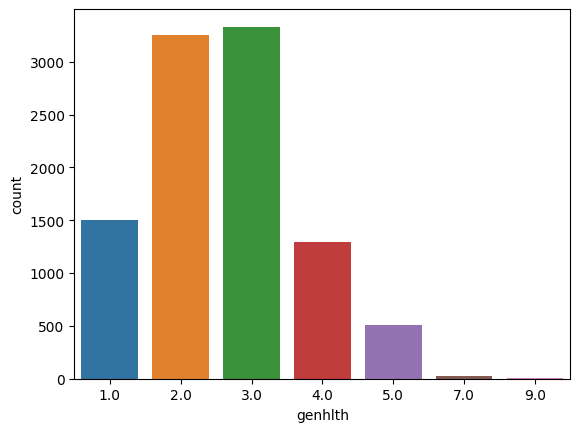

In [73]:
sns.countplot(df_Indiana_Health, x="genhlth")

<Axes: xlabel='x.smoker3', ylabel='count'>

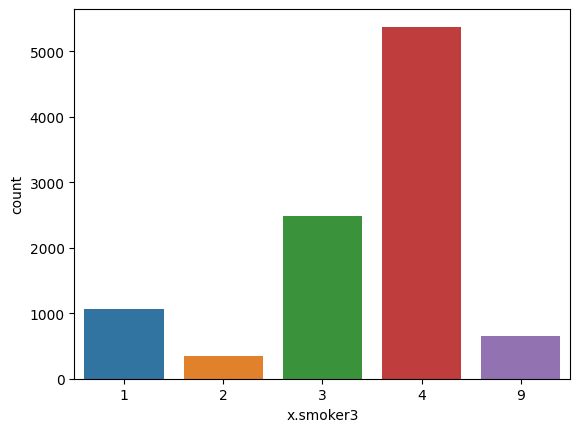

In [74]:
sns.countplot(df_Indiana_Health, x="x.smoker3")